In [1]:
import pandas as pd

import os
import pickle
import numpy as np

import scipy
import scipy.sparse as sp
import scipy.io as spio

import isolearn.io as isoio
import isolearn.keras as iso

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.lines as pltl

from analyze_random_mpra_isoform_logodds_ratios_helpers import *


Using TensorFlow backend.


In [2]:
#Load plasmid data
plasmid_dict = isoio.load('../data/random_mpra_legacy/combined_library/processed_data_lifted/apa_plasmid_data_legacy')
df = plasmid_dict['plasmid_df']
cuts = plasmid_dict['plasmid_cuts']

#Filter data on sublibrary Alien1
keep_index = np.nonzero(df['library_index'] == 22)[0]
df = df.iloc[keep_index].copy().reset_index(drop=True)
cuts = cuts[keep_index, :]

#Filter on min read count
keep_index = np.nonzero(df['total_count_cuts'] >= 20)[0]
df = df.iloc[keep_index].copy().reset_index(drop=True)
cuts = cuts[keep_index, :]

print('n = ' + str(len(df)))


/home/johli/anaconda3/envs/aparent/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


n = 505084


In [3]:
bases = "ACGT"

mer2 = []
mer2_dict = {}
mer2_i = 0
for base1 in bases:
    for base2 in bases:
        mer2.append(base1 + base2)
        mer2_dict[base1 + base2] = mer2_i
        mer2_i += 1

In [4]:
#Get vector of total cleavage counts
c = np.ravel(list(df['total_count_cuts'].values))

#Cut region
seq_list = (df['seq'].str.slice(60, 85)).values

cuts_dense = np.array(cuts.todense())[:, 60 : 85 - 1]
cuts_row = np.ravel(np.sum(cuts_dense, axis=1))
mer2_cut_dict, mer2_count_dict = generate_mer_cutdict(seq_list, mer2, mer2_dict, c, cuts_dense, cuts_row)

mer2_cutprob_dict = {}
for mer in mer2 :
    mer2_cutprob_dict[mer] = np.sum(mer2_cut_dict[mer]) / mer2_count_dict[mer]


Read up to sequence: 0
Read up to sequence: 100000
Read up to sequence: 200000
Read up to sequence: 300000
Read up to sequence: 400000
Read up to sequence: 500000


In [5]:
#Compute cleavage dinucleotide log odds ratios

w_cut2 = get_logodds_ratios_from_dict_no_bootstrap(mer2, mer2_cutprob_dict, mer2_cut_dict, mer2_count_dict)


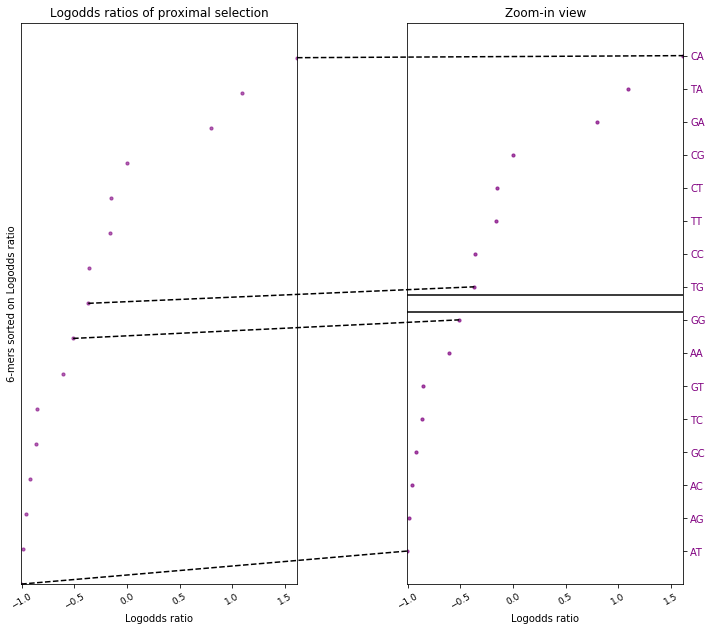

In [6]:
#Plot cleavage dinucleotide logodds ratios

plot_logodds_ratios_from_dict_no_bootstrap(w_cut2, mer2, mer2_dict)
